# Exploratory Data Analysis

**“Guessing what the pitcher is going to throw is 80 percent of being a successful hitter. The other 20 percent is just execution.” -Hank Aaron.**

My objective is to utilize all of the situational pre-pitch data a batter has in order to predict the next most likely pitch. In this section I will explore all of the data a pitcher has pre-pitch and explore their relationships/distributions. 

Can I codify pitch sequences into the model? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
df = pd.read_csv('../../sc_2018_data')

In [18]:
df = df.drop(columns=['Unnamed: 0', 'index'])

In [19]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [20]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2018-10-28,84.0,3.05,5.26,Chris Sale,592518.0,519242.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,13.0,Manny Machado strikes out swinging.,W,R,L,LAD,BOS,S,2.0,NaN,1.0,2.0,2018.0,-1.35,-0.26,-1.69,0.90,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543877.0,NaN,181029_031720,-8.287278,-121.937872,-3.051222,-11.346649,26.649434,-34.287809,3.49,1.60,NaN,NaN,NaN,82.9,2681.0,5.9,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.56,NaN,NaN,0.0,1.0,0.0,0.0,NaN,65.0,4.0,Slider,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
1,FF,2018-10-28,95.3,3.17,5.50,Chris Sale,592518.0,519242.0,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,W,R,L,LAD,BOS,B,NaN,NaN,0.0,2.0,2018.0,0.83,1.26,0.16,4.48,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543877.0,NaN,181029_031659,-9.701178,-138.390708,0.212266,12.883696,33.319856,-16.484654,3.74,1.72,NaN,NaN,NaN,94.6,2431.0,6.2,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,3.0,4-Seam Fastball,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
2,FF,2018-10-28,96.4,3.07,5.54,Chris Sale,592518.0,519242.0,NaN,foul,NaN,NaN,NaN,NaN,3.0,NaN,W,R,L,LAD,BOS,S,NaN,NaN,0.0,1.0,2018.0,1.05,1.04,0.62,3.59,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543877.0,NaN,181029_031631,-8.852806,-140.120015,-1.955200,15.725661,29.903912,-18.346800,3.49,1.60,NaN,NaN,NaN,96.3,2416.0,6.2,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,2.0,4-Seam Fastball,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
3,CH,2018-10-28,86.6,3.10,4.98,Chris Sale,592518.0,519242.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,13.0,NaN,W,R,L,LAD,BOS,S,NaN,NaN,0.0,0.0,2018.0,1.52,-0.02,-0.10,1.39,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,543877.0,NaN,181029_031609,-10.697003,-125.691745,-2.299318,18.251366,25.266016,-32.130579,3.49,1.60,NaN,NaN,NaN,86.3,2177.0,6.2,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,1.0,Changeup,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
4,SL,2018-10-28,78.5,3.31,5.16,Chris Sale,571771.0,519242.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,4.0,Enrique Hernandez strikes out swinging.,W,R,L,LAD,BOS,S,2.0,NaN,3.0,2.0,2018.0,-1.28,-0.25,-0.41,2.74,NaN,NaN,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,543877.0,NaN,181029_031528,-5.650976,-114.004641,2.039603,-9.806001,21.021107,-34.953400,3.32,1.51,NaN,NaN,NaN,77.2,2508.0,5.5,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,55.04,NaN,NaN,0.0,1.0,0.0,0.0,NaN,64.0,7.0,Slider,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard


In [21]:
df.shape

(731207, 89)

In [22]:
def columns_to_drop(df):
    
    drop_columns = []
    
    for column in df.columns:
        if df[column].isna().sum() == len(df):
            drop_columns.append(column)
    
    return drop_columns

In [23]:
df = df.drop(columns = columns_to_drop(df))

In [24]:
df.shape

(731207, 82)

In [25]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2018-10-28,84.0,3.05,5.26,Chris Sale,592518.0,519242.0,strikeout,swinging_strike,13.0,Manny Machado strikes out swinging.,W,R,L,LAD,BOS,S,2.0,NaN,1.0,2.0,2018.0,-1.35,-0.26,-1.69,0.90,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,543877.0,181029_031720,-8.287278,-121.937872,-3.051222,-11.346649,26.649434,-34.287809,3.49,1.60,NaN,NaN,NaN,82.9,2681.0,5.9,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.56,NaN,NaN,0.0,1.0,0.0,0.0,NaN,65.0,4.0,Slider,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
1,FF,2018-10-28,95.3,3.17,5.50,Chris Sale,592518.0,519242.0,NaN,ball,12.0,NaN,W,R,L,LAD,BOS,B,NaN,NaN,0.0,2.0,2018.0,0.83,1.26,0.16,4.48,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,543877.0,181029_031659,-9.701178,-138.390708,0.212266,12.883696,33.319856,-16.484654,3.74,1.72,NaN,NaN,NaN,94.6,2431.0,6.2,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,3.0,4-Seam Fastball,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
2,FF,2018-10-28,96.4,3.07,5.54,Chris Sale,592518.0,519242.0,NaN,foul,3.0,NaN,W,R,L,LAD,BOS,S,NaN,NaN,0.0,1.0,2018.0,1.05,1.04,0.62,3.59,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,543877.0,181029_031631,-8.852806,-140.120015,-1.955200,15.725661,29.903912,-18.346800,3.49,1.60,NaN,NaN,NaN,96.3,2416.0,6.2,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,2.0,4-Seam Fastball,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
3,CH,2018-10-28,86.6,3.10,4.98,Chris Sale,592518.0,519242.0,NaN,swinging_strike,13.0,NaN,W,R,L,LAD,BOS,S,NaN,NaN,0.0,0.0,2018.0,1.52,-0.02,-0.10,1.39,NaN,NaN,NaN,2.0,9.0,Bot,NaN,NaN,543877.0,181029_031609,-10.697003,-125.691745,-2.299318,18.251366,25.266016,-32.130579,3.49,1.60,NaN,NaN,NaN,86.3,2177.0,6.2,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,54.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,1.0,Changeup,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
4,SL,2018-10-28,78.5,3.31,5.16,Chris Sale,571771.0,519242.0,strikeout,swinging_strike,4.0,Enrique Hernandez strikes out swinging.,W,R,L,LAD,BOS,S,2.0,NaN,3.0,2.0,2018.0,-1.28,-0.25,-0.41,2.74,NaN,NaN,NaN,1.0,9.0,Bot,NaN,NaN,543877.0,181029_031528,-5.650976,-114.004641,2.039603,-9.806001,21.021107,-34.953400,3.32,1.51,NaN,NaN,NaN,77.2,2508.0,5.5,563411.0,519242.0,543877.0,456665.0,571788.0,646240.0,593428.0,643217.0,598265.0,605141.0,55.04,NaN,NaN,0.0,1.0,0.0,0.0,NaN,64.0,7.0,Slider,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard


In [26]:
df['if_fielding_alignment'].value_counts()

Standard         539175
Infield shift    129779
Strategic         58718
Name: if_fielding_alignment, dtype: int64

In [28]:
df['woba_value'].isna().sum()

544045

## What features describe the situation of the pitch?

Situational data is defined as data that defines what point in the game the pitch is occurring in, how many runners are on base and where they are located, the number of outs when the batter is up, the count the hitter is facing, the pitch the hitter just saw previously, the result of the previous at bat, the run-differential between the two teams, what type of event occurred in the previous pitch (ball, strike, or event where hitter either is out or makes it to the base), the number of pitches the batter has faced, and the alignment of the defense. 

When in the batter's box, hitters do not have access to advanced data like release position, pfx_x,	pfx_z, plate_x,	plate_z, hc_x, hc_y, vx, vy, vz0, ax, ay, az, sz_top, sz_bot, release spin rate, or effective speed.
  

In [16]:
 pitch_columns = [ 'pitcher','batter','description', 'zone', 
                 'stand', 'p_throws', 'type',  'balls', 'strikes', 
                  'on_3b', 'on_2b', 'on_1b','outs_when_up', 'inning', 
                   'inning_topbot', 'pitch_number','woba_value', 'at_bat_number', 
                   'pitch_name', 'bat_score', 'fld_score','if_fielding_alignment',
                   'of_fielding_alignment','game_pk']

In [18]:
df = df[pitch_columns]

## How to prevent data leakage

In order to prevent data leakage, I only take into account data that occurs before the current pitch is thrown. Therefore, I have to manipulate the some of the data to measure the previous outcomes. I manipulate zone to only take into account the previous pitch, the previous zone, the previous type of outcome. I also engineer a feature that takes into account the previous hitter's outcome utilizing the woba_value feature. Woba is a statistic that weighs the value of the previous hitter's outcome, therefore I can use the value for the previous plate appearance to determine what the outcome of the previous batter's plate appearance was. 

In [6]:
clean_df = pd.read_csv('../clean_sc_2018_no_leakage_2 (2).csv')

In [9]:
clean_df['previous_pitch'].value_counts()

 0.0    277578
-1.0    159588
 1.0    128103
 2.0     54659
Name: previous_pitch, dtype: int64

In [10]:
clean_df.isna().sum()

pitch_number                       0
balls                              0
strikes                            0
on_3b                              0
on_2b                              0
on_1b                              0
outs_when_up                       0
inning                             0
pitch                              0
pitch_1                            0
pitch_2                            0
previous_pitch                     0
previous_zone                      0
previous_hitter_woba               0
extra_innings                      0
stand_R                            0
p_throws_R                         0
if_fielding_alignment_Standard     0
if_fielding_alignment_Strategic    0
of_fielding_alignment_Standard     0
of_fielding_alignment_Strategic    0
run_diff                           0
inning_topbot_Top                  0
previous_type_B                    0
previous_type_S                    0
dtype: int64

In [12]:
clean_df['if_fielding_alignment_Standard'].value_counts()

1    457154
0    162774
Name: if_fielding_alignment_Standard, dtype: int64

In [13]:
clean_df['if_fielding_alignment_Strategic'].value_counts()

0    570380
1     49548
Name: if_fielding_alignment_Strategic, dtype: int64

In [14]:
clean_df['of_fielding_alignment_Strategic'].value_counts()

0    573059
1     46869
Name: of_fielding_alignment_Strategic, dtype: int64

<AxesSubplot:>

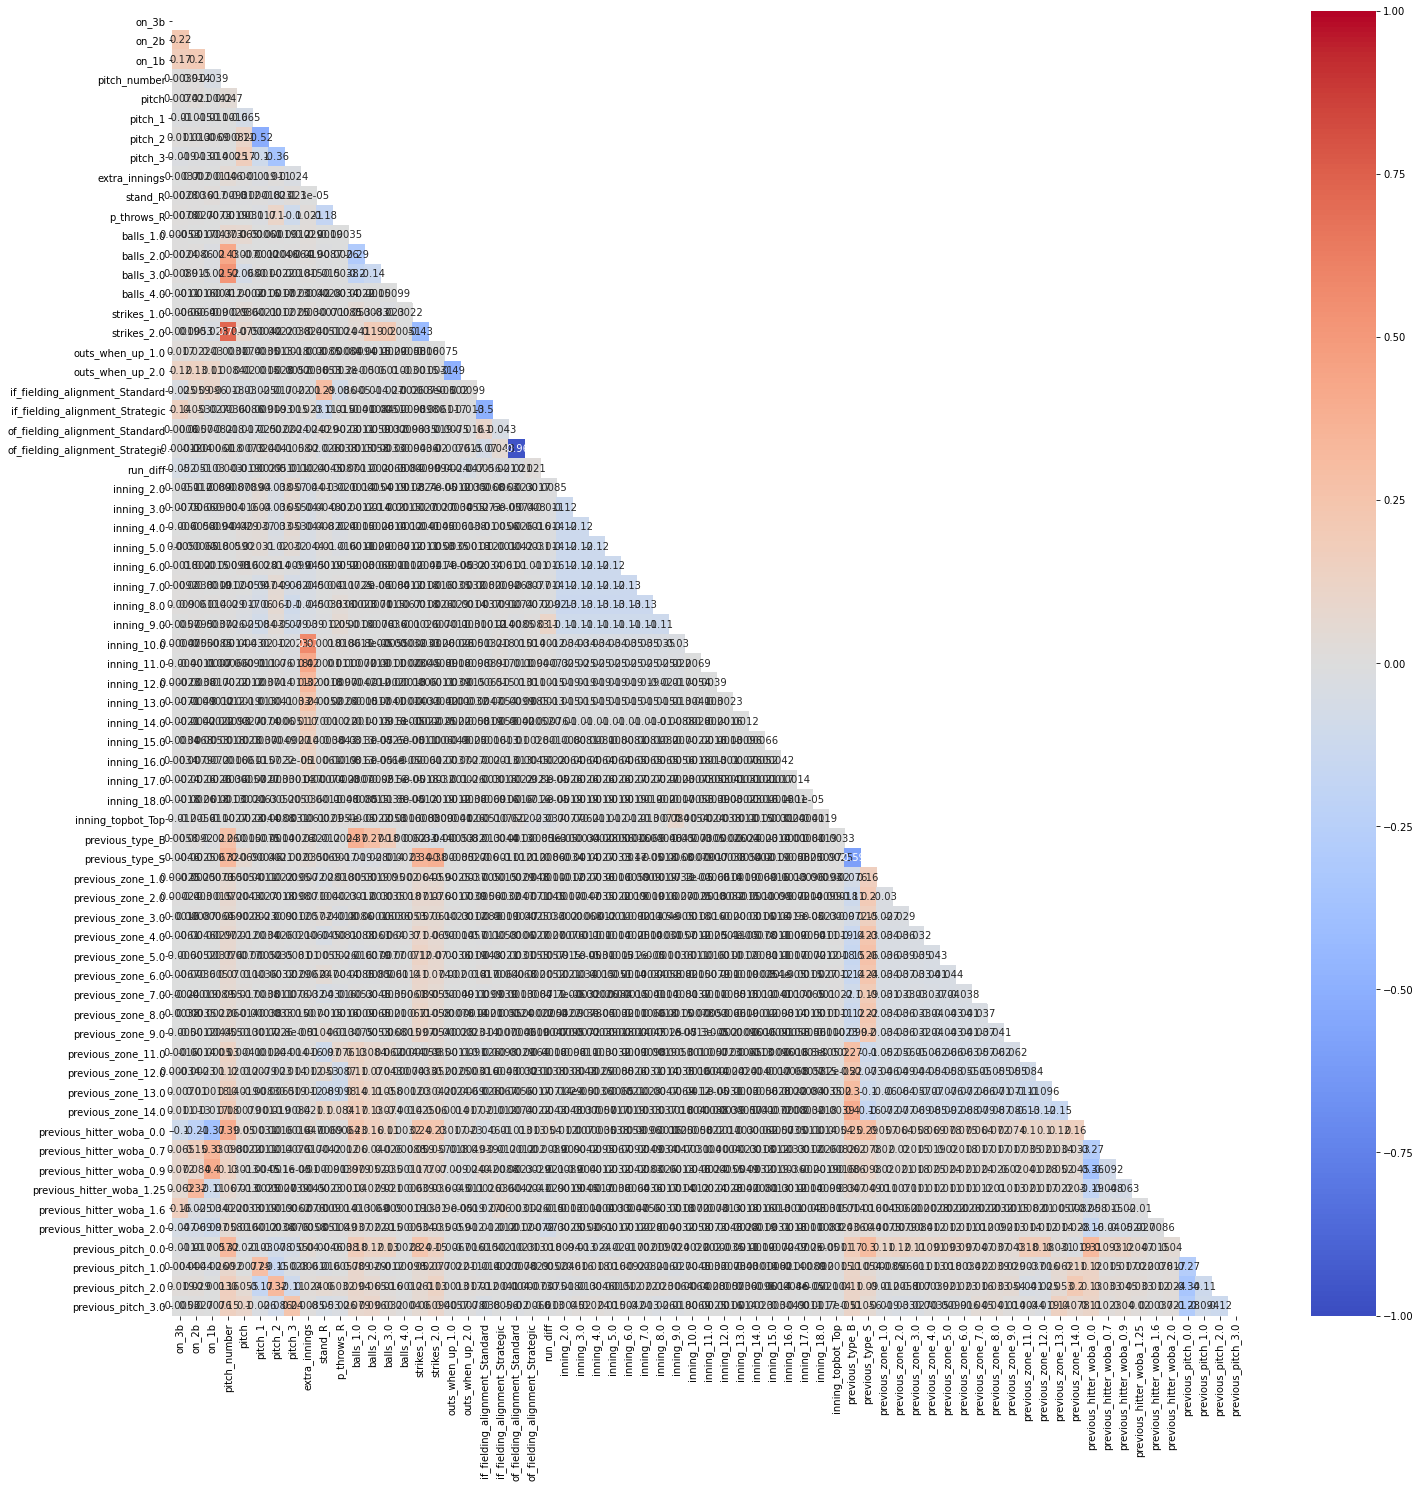

In [31]:
corr = clean_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(24,24))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [35]:
X = clean_df.drop(columns=['pitch', 'previous_type_B', 'previous_type_X', 'previous_pitch_0.0'])

In [36]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]


/Users/johnnybex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


NameError: name 'x_vars' is not defined

In [49]:
X['previous_pitch_0.0'].value_counts()

0    403636
1    327571
Name: previous_pitch_0.0, dtype: int64

In [40]:
vif['features'] = X.columns

In [51]:
vif[vif['vif_factor'] > 10]

,vif_factor,features
3,58.325394,pitch_number
15,12.491812,strikes_2.0
20,36.125208,of_fielding_alignment_Standard
41,inf,previous_type_B
42,inf,previous_type_S
43,10.630054,previous_zone_1.0
44,11.978408,previous_zone_2.0
46,14.277040,previous_zone_4.0
47,16.368846,previous_zone_5.0
48,14.949141,previous_zone_6.0


In [57]:
X = clean_df.drop(columns=['pitch', 'previous_type_S', 'previous_pitch_0.0', 'pitch_number'])

In [58]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]

vif['features'] = X.columns

In [59]:
vif['features'] = X.columns

In [63]:
vif[vif['vif_factor'] > 15]

8

In [65]:
clean_df['pitch'].value_counts(normalize=True)

0    0.601293
2    0.167840
3    0.124605
1    0.106261
Name: pitch, dtype: float64

In [67]:
clean_df['previou']

,on_3b,on_2b,on_1b,pitch_number,pitch,pitch_1,pitch_2,pitch_3,extra_innings,stand_R,p_throws_R,balls_1.0,balls_2.0,balls_3.0,balls_4.0,strikes_1.0,strikes_2.0,outs_when_up_1.0,outs_when_up_2.0,if_fielding_alignment_Standard,if_fielding_alignment_Strategic,of_fielding_alignment_Standard,of_fielding_alignment_Strategic,run_diff,inning_2.0,inning_3.0,inning_4.0,inning_5.0,inning_6.0,inning_7.0,inning_8.0,inning_9.0,inning_10.0,inning_11.0,inning_12.0,inning_13.0,inning_14.0,inning_15.0,inning_16.0,inning_17.0,inning_18.0,inning_topbot_Top,previous_type_B,previous_type_S,previous_zone_1.0,previous_zone_2.0,previous_zone_3.0,previous_zone_4.0,previous_zone_5.0,previous_zone_6.0,previous_zone_7.0,previous_zone_8.0,previous_zone_9.0,previous_zone_11.0,previous_zone_12.0,previous_zone_13.0,previous_zone_14.0,previous_hitter_woba_0.0,previous_hitter_woba_0.7,previous_hitter_woba_0.9,previous_hitter_woba_1.25,previous_hitter_woba_1.6,previous_hitter_woba_2.0,previous_pitch_0.0,previous_pitch_1.0,previous_pitch_2.0,previous_pitch_3.0
0,0,0,0,4.0,2,0.0,0.345377,0.170032,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,3.0,0,0.0,0.345377,0.170032,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,2.0,0,0.0,0.345377,0.170032,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1.0,3,0.0,0.345377,0.170032,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,7.0,2,0.0,0.345377,0.170032,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731202,0,1,1,5.0,2,0.0,0.083333,0.000000,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,-2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
731203,0,1,1,4.0,0,0.0,0.083333,0.000000,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,-2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
731204,0,1,1,3.0,0,0.0,0.083333,0.000000,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,-2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
731205,0,1,1,2.0,0,0.0,0.083333,0.000000,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,-2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
